# Look at year 1979 output after changing atm forcing from JRA55 to ERA5

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cmocean

#### Functions

In [9]:
def plot_fields(file_old, file_new, variable='so', month=0, depth=0, vmin=30, vmax=35, vdiff=3):

    fig, ax = plt.subplots(1,3, figsize=(20,7), subplot_kw={'projection': ccrs.SouthPolarStereo()}, dpi=50)
    
    for axis in ax.ravel():
        axis.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
        axis.set_boundary(map_circle, transform=axis.transAxes)
        gl = axis.gridlines(draw_labels=True, ylocs=[]);
        
    ax[0].set_title(f'With JRA55 forcing')
    ax[1].set_title(f'With ERA5 forcing')
    ax[2].set_title(f'ERA5 minus JRA55')
        
    # Separated bathymetries:
    kwags={'transform':ccrs.PlateCarree(), 'vmin':vmin, 'vmax':vmax, 'cmap':cmocean.cm.haline, 'rasterized':True}
    if file_new[variable].values.ndim <= 3: # 2D variable
        fig.suptitle(f'Month: {month+1}')
        old_plot = np.ma.masked_where(file_old.isel(time_counter=month)[variable].values == 0, file_old.isel(time_counter=month)[variable].values)
        new_plot = np.ma.masked_where(file_new.isel(time_counter=month)[variable].values == 0, file_new.isel(time_counter=month)[variable].values)
    else:
        fig.suptitle(f'Month: {month+1}, depth: {file_old.deptht.isel(deptht=depth).values:.1f}m')
        old_plot = np.ma.masked_where(file_old.isel(time_counter=month, deptht=depth)[variable].values == 0, file_old.isel(time_counter=month, deptht=depth)[variable].values)
        new_plot = np.ma.masked_where(file_new.isel(time_counter=month, deptht=depth)[variable].values == 0, file_new.isel(time_counter=month, deptht=depth)[variable].values)
    cm1 = ax[0].pcolormesh(file_old.nav_lon_grid_T, file_old.nav_lat_grid_T, old_plot, **kwags);
    cm2 = ax[1].pcolormesh(file_new.nav_lon_grid_T, file_new.nav_lat_grid_T, new_plot, **kwags);
    
    # Difference between the bathymetries:
    kwags_diff ={'transform':ccrs.PlateCarree(), 'vmin':-vdiff, 'vmax':vdiff, 'cmap':cmocean.cm.balance, 'rasterized':True}
    cm3 = ax[2].pcolormesh(file_new.nav_lon_grid_T, file_new.nav_lat_grid_T, new_plot - old_plot, **kwags_diff);
        
    CB1 = fig.colorbar(cm1, ax=ax[0], fraction=0.04)
    CB2 = fig.colorbar(cm2, ax=ax[1], fraction=0.04)
    CB3 = fig.colorbar(cm3, ax=ax[2], fraction=0.04)
    fig.set_facecolor('white')
    
    # fig.savefig('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_bathymetry_triptych.jpg')
    
    return

In [10]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

In [11]:
TERRA = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/'

In [12]:
# domain = xr.open_dataset(f'{TERRA}bathymetry/domain_cfg.nc')
# file_new = xr.open_dataset(f'{TERRA}output/atm-test1/eANT025.L121_1m_19790101_19791231_grid_T.nc')
# file_old = xr.open_dataset(f'{TERRA}output/NEMO-test3-20230914/eANT025.L121_1m_19790101_19791231_grid_T.nc')
file_new = xr.open_dataset(f'{TERRA}output/atm-ERA1/eANT025.L121_1m_19790101_19791231_SBC.nc')
file_old = xr.open_dataset(f'{TERRA}output/reference/eANT025.L121_1m_19790101_19791231_SBC.nc')

In [13]:
folder_JRA  = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/JRA55-forcing/'
folder_ERA  = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/ERA5-forcing/'

In [14]:
JRA_shortwave = xr.open_dataset(f'{folder_JRA}drowned_rsds_JRA55_y1979.nc')
ERA_shortwave = xr.open_dataset(f'{folder_ERA}converted_era5_ssrd_1979_daily_averages.nc')
JRA_longwave  = xr.open_dataset(f'{folder_JRA}drowned_rlds_JRA55_y1979.nc')
ERA_longwave  = xr.open_dataset(f'{folder_ERA}converted_era5_strd_1979_daily_averages.nc')
JRA_Tair = xr.open_dataset(f'{folder_JRA}drowned_tas_JRA55_y1979.nc')
ERA_Tair = xr.open_dataset(f'{folder_ERA}era5_t2m_1979_daily_averages.nc')

In [15]:
JRA_sw = JRA_shortwave.rsds.sel(lat=slice(-70,-50)).isel(time=slice(0,8)).mean(dim='time')
ERA_sw = ERA_shortwave.ssrd.isel(time=0).sel(latitude=slice(-50,-70))
JRA_lw = JRA_longwave.rlds.sel(lat=slice(-70,-50)).isel(time=slice(0,8)).mean(dim='time')
ERA_lw = ERA_longwave.strd.isel(time=0).sel(latitude=slice(-50,-70))
JRA_T  = JRA_Tair.tas.sel(lat=slice(-70,-50)).isel(time=slice(0,8)).mean(dim='time')
ERA_T  = ERA_Tair.t2m.isel(time=0).sel(latitude=slice(-50,-70))

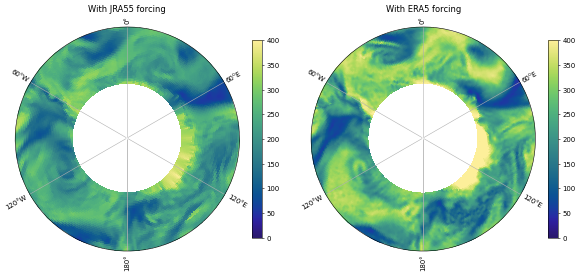

In [16]:
fig, ax = plt.subplots(1,2, figsize=(14,7), subplot_kw={'projection': ccrs.SouthPolarStereo()}, dpi=50)
    
for axis in ax.ravel():
    axis.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    axis.set_boundary(map_circle, transform=axis.transAxes)
    gl = axis.gridlines(draw_labels=True, ylocs=[]);
        
ax[0].set_title(f'With JRA55 forcing')
ax[1].set_title(f'With ERA5 forcing')
        
# Separated bathymetries:
kwags={'transform':ccrs.PlateCarree(), 'vmin':0, 'vmax':400, 'cmap':cmocean.cm.haline, 'rasterized':True}
cm1 = ax[0].pcolormesh(JRA_sw.lon, JRA_sw.lat, JRA_sw.values, **kwags);
cm2 = ax[1].pcolormesh(ERA_sw.longitude, ERA_sw.latitude, ERA_sw.values, **kwags);
CB1 = fig.colorbar(cm1, ax=ax[0], fraction=0.04)
CB2 = fig.colorbar(cm2, ax=ax[1], fraction=0.04)

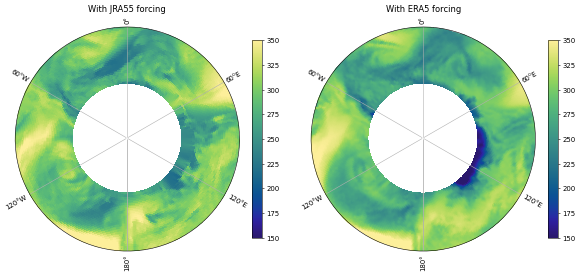

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,7), subplot_kw={'projection': ccrs.SouthPolarStereo()}, dpi=50)
    
for axis in ax.ravel():
    axis.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    axis.set_boundary(map_circle, transform=axis.transAxes)
    gl = axis.gridlines(draw_labels=True, ylocs=[]);
        
ax[0].set_title(f'With JRA55 forcing')
ax[1].set_title(f'With ERA5 forcing')
        
# Separated bathymetries:
kwags={'transform':ccrs.PlateCarree(), 'vmin':150, 'vmax':350, 'cmap':cmocean.cm.haline, 'rasterized':True}
cm1 = ax[0].pcolormesh(JRA_lw.lon, JRA_lw.lat, JRA_lw.values, **kwags);
cm2 = ax[1].pcolormesh(ERA_lw.longitude, ERA_lw.latitude, ERA_lw.values, **kwags);
CB1 = fig.colorbar(cm1, ax=ax[0], fraction=0.04)
CB2 = fig.colorbar(cm2, ax=ax[1], fraction=0.04)

Text(0.5, 0, 'net_downward_shortwave_flux_at_sea_water_surface')

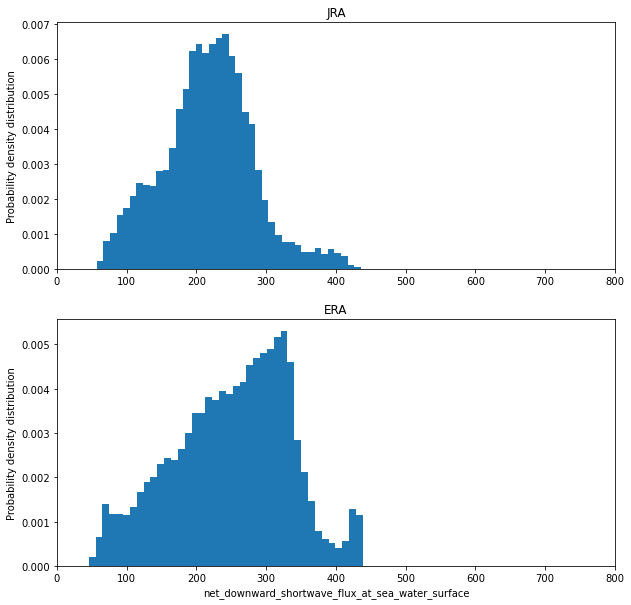

In [85]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
for axis in ax.ravel():
    axis.set_xlim(0,800)
    axis.set_ylabel('Probability density distribution')
    
a = ax[0].hist(JRA_plot, bins=40, density=True);
ax[0].set_title('JRA')
b = ax[1].hist(ERA_plot, bins=40, density=True);
ax[1].set_title('ERA')
ax[1].set_xlabel('net_downward_shortwave_flux_at_sea_water_surface')

Text(0.5, 0, 'net_downward_longwave_flux_at_sea_water_surface')

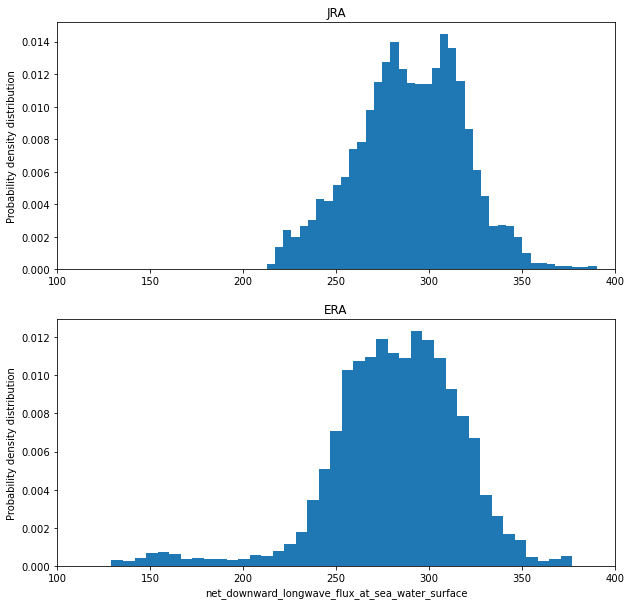

In [84]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
for axis in ax.ravel():
    axis.set_xlim(100,400)
    axis.set_ylabel('Probability density distribution')
    
a = ax[0].hist(JRA_lw.values.flatten(), bins=40, density=True);
ax[0].set_title('JRA')
b = ax[1].hist(ERA_lw.values.flatten(), bins=40, density=True);
ax[1].set_title('ERA')
ax[1].set_xlabel('net_downward_longwave_flux_at_sea_water_surface')

Text(0.5, 0, 'near-surface air temperature')

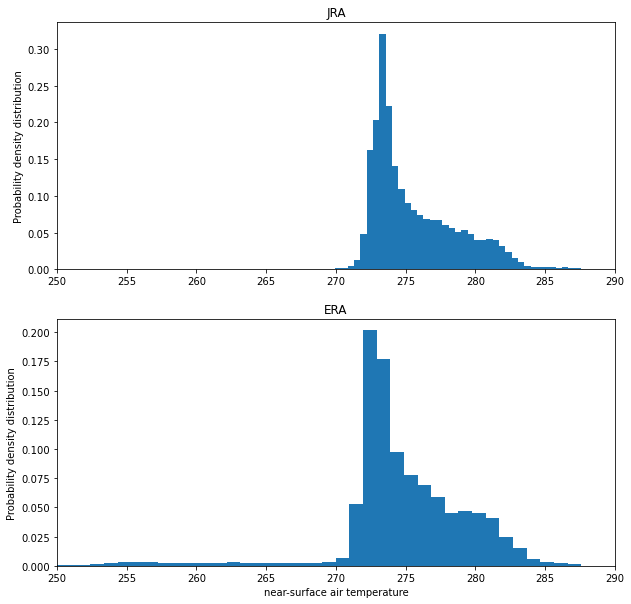

In [89]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
for axis in ax.ravel():
    axis.set_xlim(250,290)
    axis.set_ylabel('Probability density distribution')
    
a = ax[0].hist(JRA_T.values.flatten(), bins=40, density=True);
ax[0].set_title('JRA')
b = ax[1].hist(ERA_T.values.flatten(), bins=40, density=True);
ax[1].set_title('ERA')
ax[1].set_xlabel('near-surface air temperature')

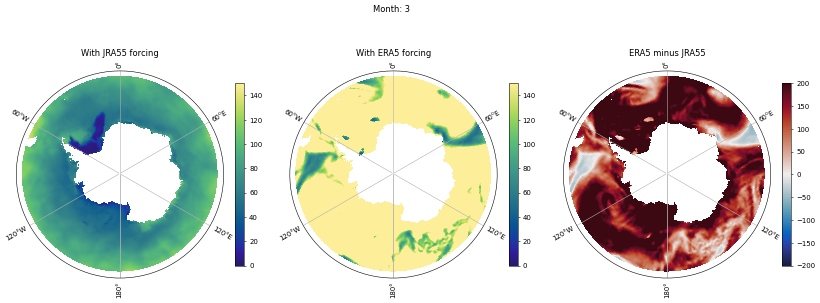

In [18]:
plot_fields(file_old, file_new, variable='qsr_oce', month=2, depth=0, vmin=0, vmax=150, vdiff=200)

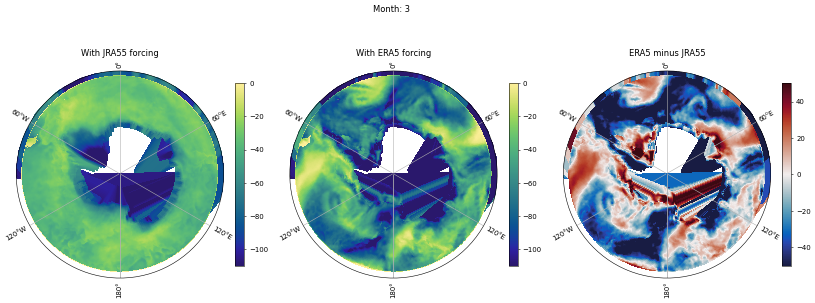

In [19]:
plot_fields(file_old, file_new, variable='qlw_oce', month=2, depth=0, vmin=0, vmax=-100, vdiff=50)

In [20]:
file_new = xr.open_dataset(f'{TERRA}output/atm-ERA7/eANT025.L121_1m_19790101_19791231_grid_T.nc')
file_old = xr.open_dataset(f'{TERRA}output/reference/eANT025.L121_1m_19790101_19791231_grid_T.nc')

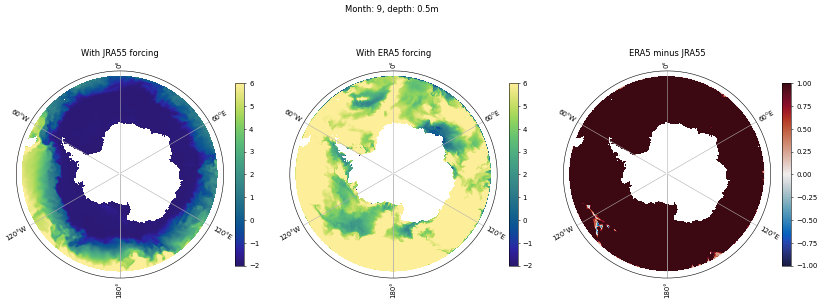

In [21]:
plot_fields(file_old, file_new, variable='thetao', month=8, depth=0, vmin=-2, vmax=6, vdiff=1)

# Salinity

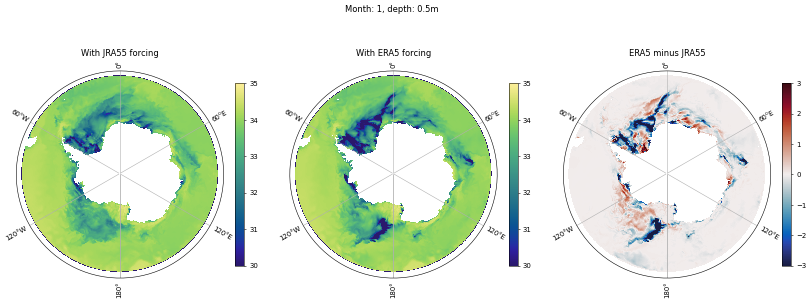

In [22]:
plot_fields(file_old, file_new, month=0, depth=0)

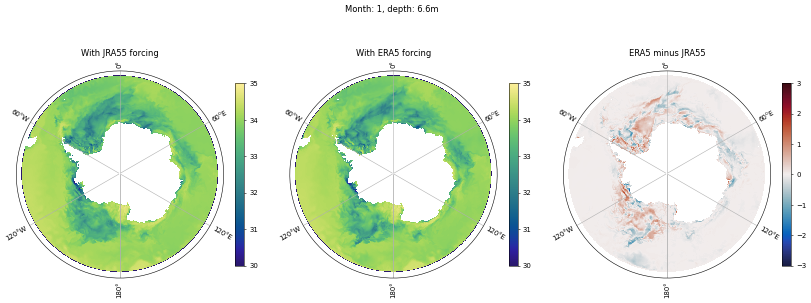

In [23]:
plot_fields(file_old, file_new, month=0, depth=5)

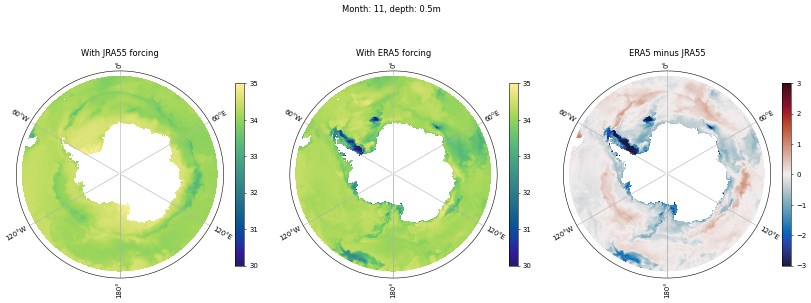

In [24]:
plot_fields(file_old, file_new, month=10, depth=0)

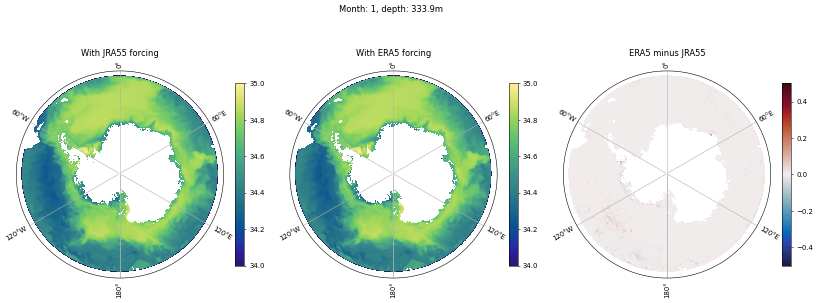

In [25]:
plot_fields(file_old, file_new, month=0, depth=40, vmin=34, vmax=35, vdiff=0.5)

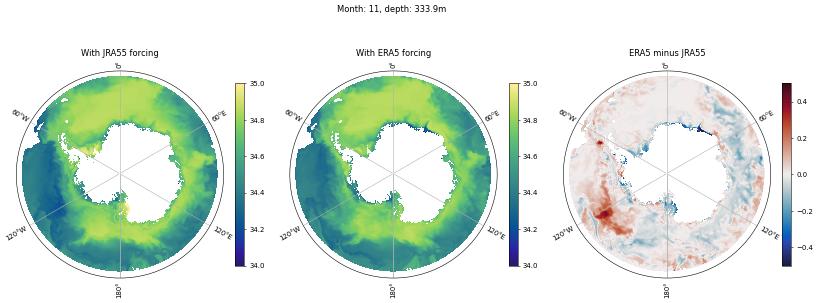

In [26]:
plot_fields(file_old, file_new, month=10, depth=40, vmin=34, vmax=35, vdiff=0.5)

# Temperature

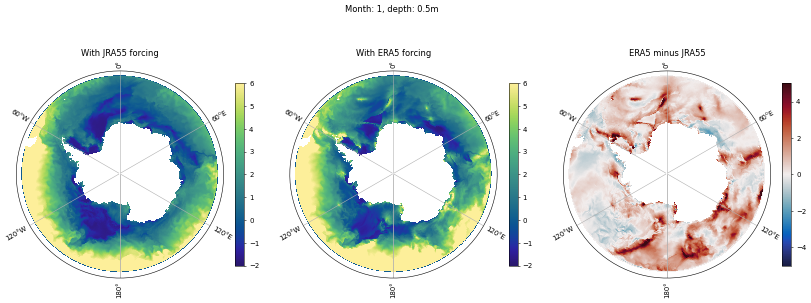

In [27]:
plot_fields(file_old, file_new, variable='thetao', month=0, depth=0, vmin=-2, vmax=6, vdiff=5)

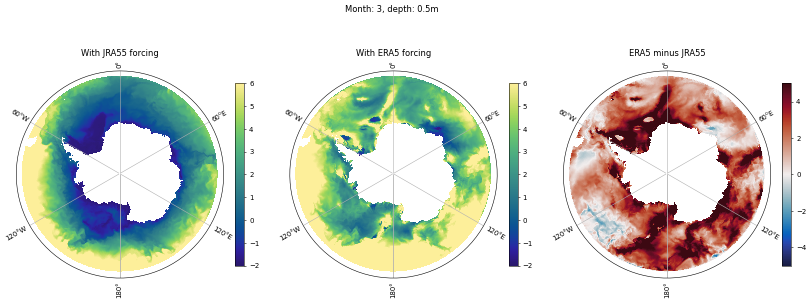

In [28]:
plot_fields(file_old, file_new, variable='thetao', month=2, depth=0, vmin=-2, vmax=6, vdiff=5)

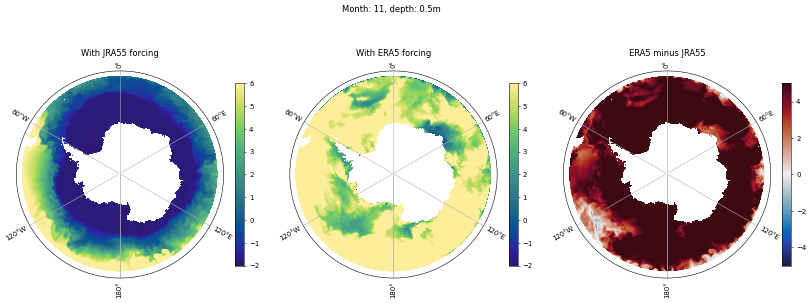

In [29]:
plot_fields(file_old, file_new, variable='thetao', month=10, depth=0, vmin=-2, vmax=6, vdiff=5)

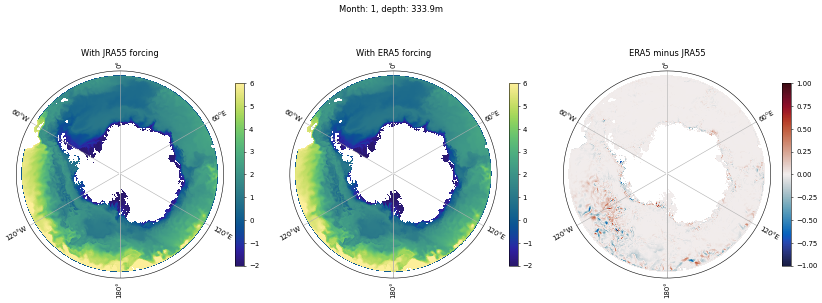

In [30]:
plot_fields(file_old, file_new, variable='thetao', month=0, depth=40, vmin=-2, vmax=6, vdiff=1)

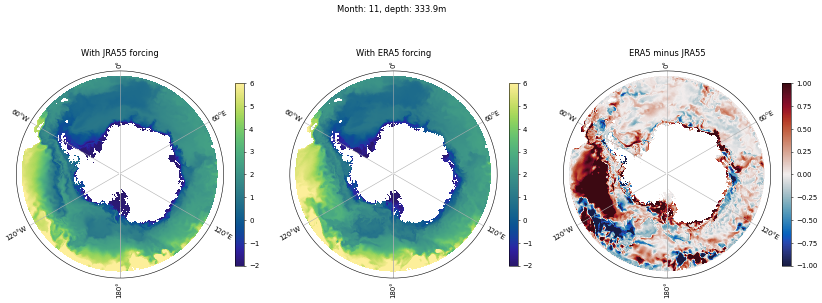

In [31]:
plot_fields(file_old, file_new, variable='thetao', month=10, depth=40, vmin=-2, vmax=6, vdiff=1)